# **Fundamental concepts**

## - **n-gram**: it is a sequence of n consecutive words.
## - **collocation**: the habitual juxtaposition of a particular word with another word or words with a frequency greater than chance.

In [1]:
import nltk

nltk.download('book')
from nltk.book import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

In [27]:
from nltk import bigrams

n_grams = list(bigrams(text1))
freq_dist = FreqDist(n_grams)

In [28]:
freq_dist.most_common(10)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

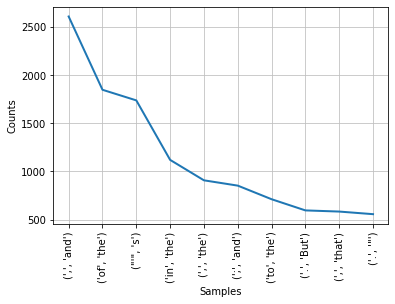

In [29]:
freq_dist.plot(10)

In [30]:
threshold = 2
filtered_bigrams = [bigram for bigram in n_grams if len(bigram[0]) > threshold and len(bigram[1]) > threshold]
filtered_dist = FreqDist(filtered_bigrams)
filtered_dist

FreqDist({('Moby', 'Dick'): 83,
          ('Herman', 'Melville'): 1,
          ('Melville', '1851'): 1,
          ('Late', 'Consumptive'): 1,
          ('Consumptive', 'Usher'): 1,
          ('Grammar', 'School'): 1,
          ('The', 'pale'): 1,
          ('pale', 'Usher'): 1,
          ('and', 'brain'): 1,
          ('see', 'him'): 19,
          ('him', 'now'): 8,
          ('was', 'ever'): 2,
          ('ever', 'dusting'): 1,
          ('dusting', 'his'): 1,
          ('his', 'old'): 14,
          ('old', 'lexicons'): 1,
          ('lexicons', 'and'): 1,
          ('and', 'grammars'): 1,
          ('queer', 'handkerchief'): 1,
          ('mockingly', 'embellished'): 1,
          ('embellished', 'with'): 2,
          ('with', 'all'): 44,
          ('all', 'the'): 198,
          ('the', 'gay'): 5,
          ('gay', 'flags'): 1,
          ('the', 'known'): 4,
          ('known', 'nations'): 1,
          ('the', 'world'): 86,
          ('dust', 'his'): 1,
          ('old', 'grammars'): 

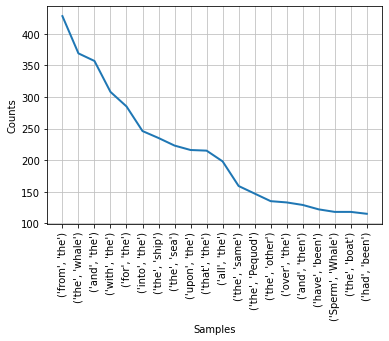

In [31]:
filtered_dist.plot(20)

In [32]:
from nltk.util import ngrams

trigrams = list(ngrams(text1, 3)) # trigrams
trigrams_dist = FreqDist(trigrams)
trigrams_dist.most_common(10)

[((',', 'and', 'the'), 187),
 (('don', "'", 't'), 103),
 (('of', 'the', 'whale'), 101),
 ((',', 'in', 'the'), 93),
 ((',', 'then', ','), 87),
 (('whale', "'", 's'), 81),
 (('.', 'It', 'was'), 81),
 (('ship', "'", 's'), 80),
 (('the', 'Sperm', 'Whale'), 77),
 ((',', 'as', 'if'), 76)]

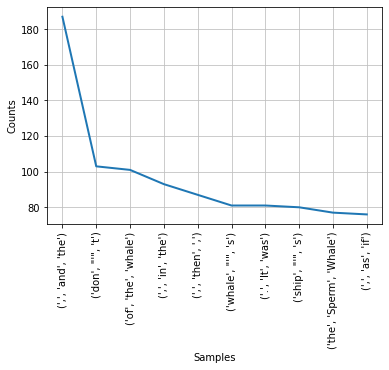

In [33]:
trigrams_dist.plot(10)

# Pointwise Mutual Information (PMI)
## Somehow quantify our n-grams, and determine if we have a collocation.

In [47]:
n_grams = list(bigrams(text1))

threshold = 2
filtered_bigrams = [bigram for bigram in n_grams if len(bigram[0]) > threshold and len(bigram[1]) > threshold]
filtered_bigrams_dist = FreqDist(filtered_bigrams)

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
filtered_words = [word for word in text1 if word not in stop_words and len(word) > 2]
filtered_words_dist = FreqDist(filtered_words)

df = pd.DataFrame() # as an Excel sheet, but using Python
df['bigrams'] = list(set(filtered_bigrams))
df['word_0'] = df['bigrams'].apply(lambda x: x[0])
df['word_1'] = df['bigrams'].apply(lambda x: x[1])
df['bigram frequency'] = df['bigrams'].apply(lambda x: filtered_bigrams_dist[x])
df['word_0 frequency'] = df['word_0'].apply(lambda x: filtered_words_dist[x])
df['word_1 frequency'] = df['word_1'].apply(lambda x: filtered_words_dist[x])

In [48]:
df

,bigrams,word_0,word_1,bigram frequency,word_0 frequency,word_1 frequency
0,"(that, seemed)",that,seemed,6,0,283
1,"(little, staggered)",little,staggered,1,247,3
2,"(the, castors)",the,castors,1,0,2
3,"(that, brute)",that,brute,2,0,7
4,"(long, filled)",long,filled,1,318,22
...,...,...,...,...,...,...
67937,"(the, homewardbound)",the,homewardbound,1,0,1
67938,"(and, helmeted)",and,helmeted,1,0,3
67939,"(intellectual, but)",intellectual,but,1,4,0
67940,"(his, prey)",his,prey,6,0,14


In [71]:
"""
  The less negative PMI, the most probability of getting a collocation. But, because we can have cases with less PMI, but greater words frequencies,
  we also need to analyze the n-gram frequency metric.
"""

df['PMI'] = df[['bigram frequency', 'word_0 frequency', 'word_1 frequency']].apply(lambda x: np.log2(x.values[0] / (x.values[1] * x.values[2])), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning:

divide by zero encountered in long_scalars



In [72]:
df['log(bigram_frequency)'] = df['bigram frequency'].apply(lambda x: np.log2(x)) # we apply log to have the same scale in our plot, because of the PMI

In [69]:
df.sort_values(by='PMI', ascending=False)
df

,bigrams,word_0,word_1,bigram frequency,word_0 frequency,word_1 frequency,PMI,log(bigram_frequency,log(bigram_frequency)
0,"(that, seemed)",that,seemed,6,0,283,inf,2.584963,2.584963
1,"(little, staggered)",little,staggered,1,247,3,-9.533330,0.000000,0.000000
2,"(the, castors)",the,castors,1,0,2,inf,0.000000,0.000000
3,"(that, brute)",that,brute,2,0,7,inf,1.000000,1.000000
4,"(long, filled)",long,filled,1,318,22,-12.772315,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
67937,"(the, homewardbound)",the,homewardbound,1,0,1,inf,0.000000,0.000000
67938,"(and, helmeted)",and,helmeted,1,0,3,inf,0.000000,0.000000
67939,"(intellectual, but)",intellectual,but,1,4,0,inf,0.000000,0.000000
67940,"(his, prey)",his,prey,6,0,14,inf,2.584963,2.584963


In [70]:
fig = px.scatter(x=df['PMI'].values, y=df['log(bigram_frequency)'], color=df['PMI']+df['log(bigram_frequency)'],
                 hover_name=df['bigrams'].values, width=600, height=600, labels={'x': 'PMI', 'y': 'Log(Bigram frequency)'})
fig.show()

#### **In conclusion**: collocations help us to identify important places, persons, names, objects in a document, and start assigning some kind of labels to words or expressions that can give us crutial information about elements for the text understanding.